# Machine Learning Engineer Nanodegree
##Model Evaluation & Validation
##Project 1: Predicting Boston Housing Prices

**Long Nguyen (longnd@gmail.com) **

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

#Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
import sklearn.metrics

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

#not yet used, a potential improvement to normalize data before hand
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features

housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


#Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

##Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [2]:
# Number of houses in the dataset
total_houses = np.size(housing_prices)

# Number of features in the dataset
total_features = np.size(housing_features) / np.size(housing_prices)

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


##Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **
From my own experience with buying a house, the following features seem to be most important in determining the price of a house. 
1. RM : number of rooms
2. DIS : weighted distance to Boston 5 employement centers
3. Age: proportion of owner-occupied units built prior to 1940

Typically the total amount of property tax can have a good correlation with the house prices, but the tax information we have is only per $10 000

Maybe for next assignment: with Sklearn we can also use RandomForestClassifier to rank the important of the features. (somehow it still gives exception on the Boston data set)


##Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [3]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


#Average Number of rooms: 5.6; 
Weighted distance to five Boston employment centers : 1.385
Age (proportion of owner-occupied units built prior to 1940): 90 (relatively old)

#Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

##Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [13]:
# Put any import statements you need for this code block here

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    # order different between standard sklearn-kit method signature can provided code
    # it's prone to error but i will not change since the test/grader may need to be adapted
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # optional, we can do do standard scaling (normalize data) on X_train and X_test to optimize performance
    """sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test) """
    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
    print np.size(housing_prices), np.size(y_train), np.size(y_test)
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!
506 354 152


##Question 4
*Why do we split the data into training and testing subsets for our model?*

**Answer: **
Spliting data into training and testing data is a standard technique to prevent overfitting. 
If we use all input data as train data for the learning algorithm, the algorithm may try to "overfit" this set of data. 
Furthermore, if we do not have test data separately, it is difficult to validate and optimize the performance of the model (e.g. use to optimize the model parameters). It's like learning to drive only in closed terrain. 



##Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know if the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [5]:
# Put any import statements you need for this code block here

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    return mean_absolute_error(y_true, y_predict)
    #return sklearn.metrics.accuracy_score(y_true, y_predict)

# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation! ", total_error
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!  0.0


##Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

Accuracy, Precision, Recall, F1 score are good fit for binary classification. 
However, the Boston housing dataset requires the use of regression error metric, which makes MSE and MAE good candidates. 

For Boston data set, MSE can create bias for the dataset, since value < 1 will get smaller when squared, and value bigger than 1 will get much bigger when squared. Therefore, not all data will be treated equal with this data set. 

MAE will be the best pick for the Boston data set because it treat all data equally (by default).  


##Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [6]:
# Put any import statements you need for this code block

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric, greater_is_better=False)
   
    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, parameters, scoring = scoring_function)
    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg

# Test fit_model
try:
    reg = fit_model(X_train, y_train)
    #reg = fit_model(housing_features, housing_prices) #try with complete dataset
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


##Question 5
*What is the grid search algorithm and when is it applicable?*

GridSearch is a bruteforce technique used to optimize the model (hyper) parameters. Hyperparameters are parameters not learnt from training data, but used to optimize the learning models. An example of hyperparameter is the depth parameter of a decision tree. 
GridSearch is basically a bruteforce/exhaustive search. It works from the provided list of possible values of hyperparameters. After that it will apply the parameters in the model, and calculate which model yield the best accuracy. 
It is applicable when we know the possible range of parameters we want to optimize (e.g. depth of decision tree) and the availability of the accuracy calculation algorithm (scoring).



##Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

Cross validation is a similar technique to spliting data to training and testing dataset for validation. (k-fold) cross validation allows us to iterate the process of spliting data to train-test dataset in a round robin fashion, thus can improve performance of the learning model (it's like having multiple train/test data set with much larger number of data to work with). This approach can be computationally expensive, but does not waste too much data. This is benefitial for smaller dataset like Boston data set. 

Similarly, using cross validation with grid search will be particularly useful with a small data set. Which each iteration of cross validation, we can perform a grid search function, and average the values across the iterations. This will provide a better result than just simply doing grid search on a training/ testing set alone. 



#Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [7]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [8]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

#Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


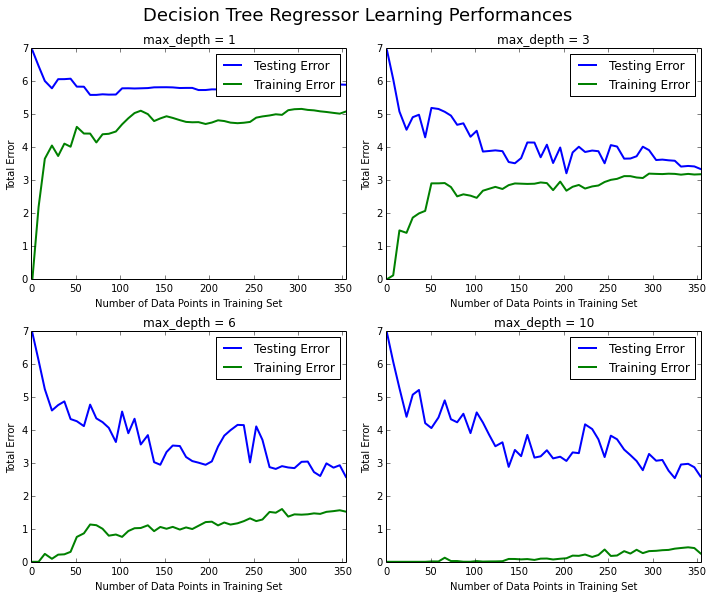

In [9]:
learning_curves(X_train, y_train, X_test, y_test)

##Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

I choose to describe max_depth = 6 tree (bottom left graph). 

Generally for all max_depth, the following hold true: 

* As the size of the training set increases, the training error increases. The reason is with a smaller dataset, it is always easier to find a "fit function" that minimize cost. The more data we have, the more difficult it is to fit all the data point, thus error will increase. 

* As the size of the testing set increases, the testing error decreases. This is because with larger dataset, we can build and tune better learning model and parameters. It will then match the unseen (test) data better. It is like the more practice driving hours you have with instructor, the less errors you will make when driving on a real road alone. 

Specifically for max depth = 6 (or 3 for that matter), the training and testing error will converge at an "acceptable" error level (~3). At max depth = 1, the error level is too high. Higher max depth than 6 do not produce better accuracy. 

##Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

When max depth is 1: the model suffers from high bias (underfit), meaning the training and testing error converge very fast even with low amount of dataset. However, the error for both training and testing set stays relatively high (around 5) as test size increase, which will produce low accuracy for the final model. There is no improvement in accuracy when new data is added. 

When max depth is 10: the model suffers from high variance; training and testing data do not  converge as data set size increase. This is the result of unnecessary overfitting the training set (make the model overcomplex while not produce a better result than a simpler model). This overfitted model often tends not to generalize well to unseen data. Accuracy is better than max depth = 1 (less error), but accuracy level is similar to maxdepth = 3 or 6. 

Max depth 3 or 6 seems to give good bias-variance trade-off. Both trees also give the reasonable error (around 3, which is around 10% of median housing price) as the test size increases.

Creating a model complexity graph. . . 


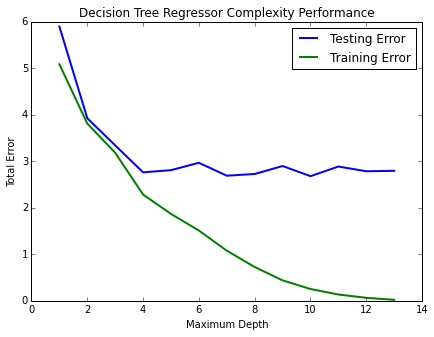

In [10]:
model_complexity(X_train, y_train, X_test, y_test)

##Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

For training data: the error decreases as max depth increase. 
For testing error: the error decreases as max depth increase till max depth = 5, then it fluctuate at that error level. 
So max depth around 5 gives the lowest error (around 3, which is around 10% the mean house value) while keep the model complexity reasonable (the deeper the tree, the more complex the model. And in this case more complexity does not deliver lower error). 

#Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. *To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

##Question 10
*Using grid search, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [11]:
print "Final model optimal parameters:", reg.best_params_

Final model optimal parameters: {'max_depth': 9}


Best depth created by the GridSearchCV is around 6. This gives the best accuracy (error around 3, 10% of mean house value). Furtheremore, model complexity is better (less complex) than higher max depth. 
This model also do not suffer from high bias nor high variance. 

Since the Boston data is rather small, this value can change (between 3-7) on different runs. 

##Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [12]:
#play with other feature values
#CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

#the dataset is rather small and produce high fluctuation on the ourcome, we will run this multiple time with different
#X_train, y_train dataset (with random_state=1 to randomize). we also choose a smaller test size (10%) for this purpose
iterations = 10
sumPredictions = 0.0
for i in range(iterations):
    X_train, X_test, y_train, y_test = train_test_split(housing_features, housing_prices, test_size = 0.1, random_state = 1)
    reg = fit_model(X_train, y_train)
    predict = reg.predict(CLIENT_FEATURES)
    #print "Predict ", predict, " tree depth ", reg.best_params_ 
    sumPredictions += predict

sale_price = sumPredictions / iterations

print "Predicted value of client's home: {0:.3f}".format(sale_price[0])
print "Mean house price ", np.mean(housing_prices)
print "Mean number of rooms", np.mean(city_data.data[:,5]), " client ", CLIENT_FEATURES[0][5]
print "Mean age", np.mean(city_data.data[:,6]), " client ", CLIENT_FEATURES[0][6]
print "Mean distance", np.mean(city_data.data[:,7]), " client ", CLIENT_FEATURES[0][7]

Predicted value of client's home: 19.656
Mean house price  22.5328063241
Mean number of rooms 6.28463438735  client  5.609
Mean age 68.5749011858  client  90.0
Mean distance 3.79504268775  client  1.385


**Answer: **

The predicted price of the client is around 19.851, a bit lower than the mean house price value. This is consistent among 10 runs with test data being randomzied. 
I played with different values for distance, #rooms, age but it doesn't really matter with the prediction. 


##Question 12: 

The created model gives me mixed confidence for future usage because: 
* ++: "Desired accuracy/ Acceptable error": Error around 10% of the median house price. 
* ++: Good variance - bias trade off at max depth around 6
* --: prediction does not really change when the data of some attributes are changed (tax, age, distance). 
* --: dataset is rather small. Playing with random state in shuffling test/train data and percentage of test/train data seem to have big impact on the result of tree depth (hyper parameter). 

Maybe we need to have a bigger data set or prune the data better for future usage. Or just use a subset of housing features for prediction instead of all. 
 